# **Top 2000 Compagnies in the world based on Forbes**

### **In this project we are going to analyse the structure, the performance of the Top 2000 compagnies in the world**
**Financial metrics (Sales , Profit , Assets , Market Value ) are in billions of dollars.**

In [183]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from warnings import  filterwarnings
filterwarnings('ignore')

In [184]:
df = pd.read_csv('Largest-Companies.csv')
df.head()

,Rank,Name,Sales,Profit,Assets,Market Value,Industry,Founded,Headquarters,Country,CEO,Employees
0,1,JPMorgan Chase,252.9,50.0,4090.7,588.1,Banking and Financial Services,2000.0,New York- New York,United States,Jamie Dimon,186751.0
1,2,Berkshire Hathaway,369.0,73.4,1070.0,899.1,Conglomerate,1839.0,Omaha- Nebraska,United States,Warren Edward Buffett,396500.0
2,3,Saudi Arabian Oil Company (Saudi Aramco),489.1,116.9,661.5,1919.3,Construction- Chemicals- Raw Materials,1933.0,Dhahran,Saudi Arabia,Amin bin Hasan Al-Nasser,70000.0
3,4,ICBC,223.8,50.4,6586.0,215.2,Banking and Financial Services,1984.0,Beijing,China,Wang Jingwu,427587.0
4,5,Bank of America,183.3,25.0,3273.8,307.3,Banking and Financial Services,1904.0,Charlotte- North Carolina,United States,Brian T. Moynihan,166140.0


In [185]:
df.shape

(2001, 12)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          2001 non-null   int64  
 1   Name          2001 non-null   object 
 2   Sales         2001 non-null   float64
 3   Profit        2001 non-null   float64
 4   Assets        2001 non-null   float64
 5   Market Value  2001 non-null   float64
 6   Industry      1999 non-null   object 
 7   Founded       1999 non-null   float64
 8   Headquarters  1991 non-null   object 
 9   Country       2001 non-null   object 
 10  CEO           1970 non-null   object 
 11  Employees     1943 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 187.7+ KB


Text(0.5, 1.0, 'messing values')

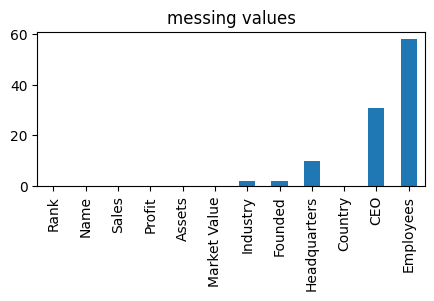

In [187]:
plt.figure(figsize=(5,2))
df.isna().sum().plot(kind='bar')
plt.title('messing values')

In [188]:
df.dropna(axis=0,inplace=True)

Text(0.5, 1.0, 'after droping messing data ')

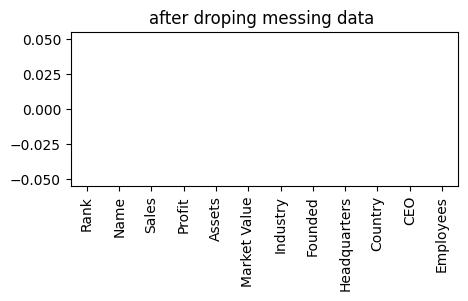

In [189]:
plt.figure(figsize=(5,2))
df.isna().sum().plot(kind='bar')
plt.title('after droping messing data ')

In [190]:
[col for col in df.columns if df[col].dtype == 'object' ]

['Name', 'Industry', 'Headquarters', 'Country', 'CEO']

In [191]:
for col in [col for col in df.columns if df[col].dtype == 'object' ]:
    print(col)
    print('-'*100)
    print(df[col].unique())
    print('_'*100)

Name
----------------------------------------------------------------------------------------------------
['JPMorgan Chase' 'Berkshire Hathaway'
 'Saudi Arabian Oil Company (Saudi Aramco)' ... 'Adient'
 'CapitaLand Investment' "Shanxi Lu'an Environmental"]
____________________________________________________________________________________________________
Industry
----------------------------------------------------------------------------------------------------
['Banking and Financial Services' 'Conglomerate'
 'Construction- Chemicals- Raw Materials' 'Retail and Wholesale'
 'IT Software & Services' 'Banking' 'Consumer Durables'
 'Semiconductors- Electronics- Electrical Engineering'
 'Business Services & Supplies' 'Oil & Gas Operations' 'Insurance'
 'Pharmacies' 'Diversified Financials'
 'Telecommunications Services- Cable Supplier' 'Media & Advertising'
 'Automotive (Automotive and Suppliers)' 'Drugs & Biotechnology'
 'Clothing- Shoes- Sports Equipment'
 'Food- Soft Beverages- Alcoho

for a better understanding of out data we will create a new feature called Domain that we have 12 unique values that will group our data by a global domain using the industry feature in order to get a global view on the performance of each domain in a global way,

* ['Banking_and_Financial_Services', 'Conglomerates',
       'Construction & Real Estate', 'Retail & Consumer Goods',
       'Technology & Software', 'Professional Services',
       'Energy & Utilities', 'Miscellaneous',
       'Healthcare & Pharmaceuticals', 'Media & Entertainment',
       'Transportation & Logistics', 'Food & Hospitality']

In [192]:
def map_category(Industry):
    if pd.notnull(Industry):
        if "Banking" in Industry or "Financial Services" in Industry:
            return "Banking_and_Financial_Services"
        elif "Software" in Industry or "Technology" in Industry or "Semiconductors" in Industry:
            return "Technology & Software"
        elif "Retail" in Industry or "Wholesale" in Industry or "Consumer" in Industry:
            return "Retail & Consumer Goods"
        elif "Construction" in Industry or "Real Estate" in Industry or "Materials" in Industry:
            return "Construction & Real Estate"
        elif "Health" in Industry or "Medical" in Industry or "Pharma" in Industry:
            return "Healthcare & Pharmaceuticals"
        elif "Food" in Industry or "Drink" in Industry or "Restaurant" in Industry or "Hotel" in Industry:
            return "Food & Hospitality"
        elif "Media" in Industry or "Advertising" in Industry:
            return "Media & Entertainment"
        elif "Transport" in Industry or "Auto" in Industry or "Logistics" in Industry:
            return "Transportation & Logistics"
        elif "Oil" in Industry or "Gas" in Industry or "Utilities" in Industry:
            return "Energy & Utilities"
        elif "Service" in Industry or "Business" in Industry or "Professional" in Industry:
            return "Professional Services"
        elif "Conglomerate" in Industry:
            return "Conglomerates"
        else:
            return "Miscellaneous"
    return "Miscellaneous"
df['domain'] = df['Industry'].apply(map_category)

In [221]:
df.head(4)

,Rank,Name,Sales,Profit,Assets,Market Value,Industry,Founded,Headquarters,Country,CEO,Employees,domain,Profit_Ratio,retun_of_assets,market_to_assets,sales per employee,Profit per employe,assets_utilisation
0,1,JPMorgan Chase,252.9,50.0,4090.7,588.1,Banking and Financial Services,2000.0,New York- New York,United States,Jamie Dimon,186751.0,Banking_and_Financial_Services,0.197707,0.012223,0.143765,0.001354,0.000268,0.061823
1,2,Berkshire Hathaway,369.0,73.4,1070.0,899.1,Conglomerate,1839.0,Omaha- Nebraska,United States,Warren Edward Buffett,396500.0,Conglomerates,0.198916,0.068598,0.840280,0.000931,0.000185,0.344860
2,3,Saudi Arabian Oil Company (Saudi Aramco),489.1,116.9,661.5,1919.3,Construction- Chemicals- Raw Materials,1933.0,Dhahran,Saudi Arabia,Amin bin Hasan Al-Nasser,70000.0,Construction & Real Estate,0.239010,0.176720,2.901436,0.006987,0.001670,0.739380
3,4,ICBC,223.8,50.4,6586.0,215.2,Banking and Financial Services,1984.0,Beijing,China,Wang Jingwu,427587.0,Banking_and_Financial_Services,0.225201,0.007653,0.032675,0.000523,0.000118,0.033981


<Axes: xlabel='domain'>

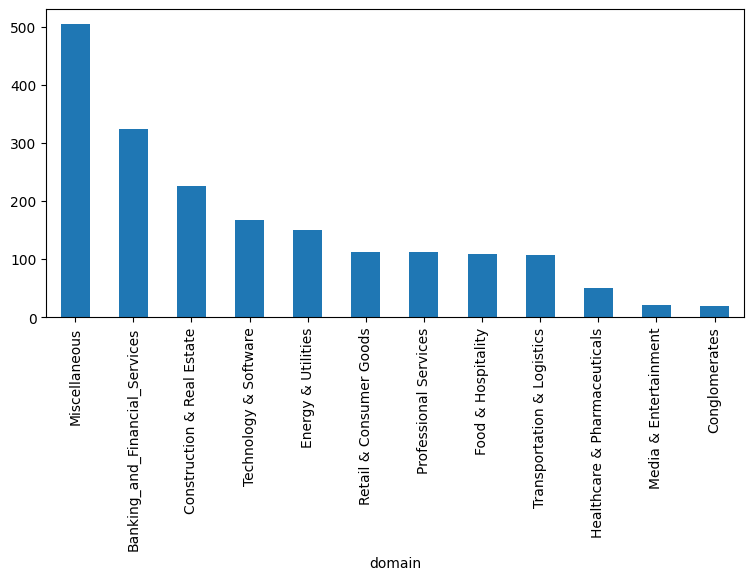

In [194]:
plt.figure(figsize=(9,4))
df.domain.value_counts().plot(kind='bar')

The plot shows a diversity of business activities. First, we have **Miscellaneous**, which includes niche markets like antiques and unique services, with up to 500 companies. Second is **Banking and Financial Services**, encompassing all financial institutions, including banks, insurance companies, investment banks, and portfolio management firms, totaling around 300 companies. Third is **Construction and Real Estate**, with 210 companies. Other sectors, like tech, energy, retail, professional services, food, and transport, each have between 100 and 200 companies. Lastly, **Healthcare** and **Media Conglomerates** have the fewest companies, with numbers below 100.

<Axes: xlabel='Country'>

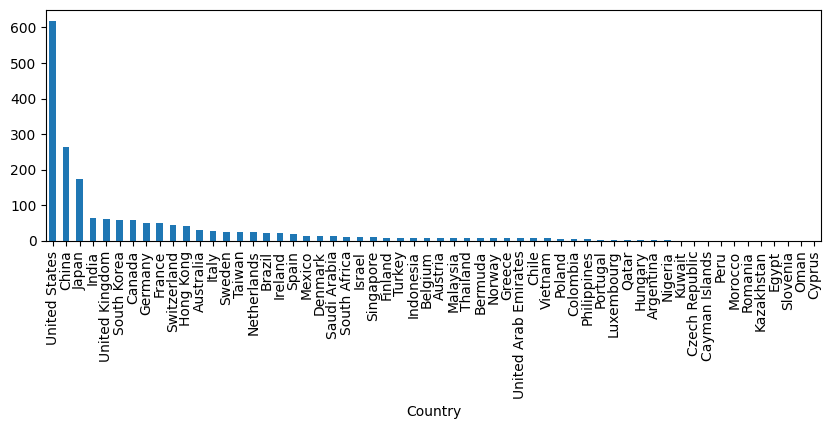

In [195]:
plt.figure(figsize=(10,3))
df.Country.value_counts().plot(kind='bar')

In [196]:
df.describe()

,Rank,Sales,Profit,Assets,Market Value,Founded,Employees
count,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1.906000e+03
mean,985.149528,26.236912,2.313138,122.202518,45.510289,1966.165792,4.892671e+04
std,577.602468,46.843536,6.318784,397.221817,152.737721,417.583489,9.010647e+04
min,1.000000,0.165000,-17.900000,1.300000,0.007000,1472.000000,1.100000e+01
25%,484.250000,6.100000,0.506900,15.500000,8.300000,1925.000000,8.571750e+03
50%,976.000000,13.100000,0.958700,33.800000,17.800000,1972.000000,2.198750e+04
75%,1479.750000,25.700000,2.200000,78.600000,39.000000,1996.000000,5.272500e+04
max,2001.000000,657.300000,116.900000,6586.000000,3123.100000,20047.000000,1.600000e+06


In [197]:
print(df.columns)

Index(['Rank', 'Name', 'Sales', 'Profit', 'Assets', 'Market Value', 'Industry',
       'Founded', 'Headquarters', 'Country', 'CEO', 'Employees', 'domain'],
      dtype='object')


### **Compagnies Performance by Domain**

In [222]:
compagnies_domain = df.groupby('domain').agg(
    Volume = ('Name','count'),
    Total_sales = ('Sales','sum'),
    avg_sales = ('Sales','mean'),
    Total_profit = ('Profit','sum'),
    avg_profit = ('Profit','mean'),
    Total_assets = ('Assets','sum'),
    avg_assets = ('Assets','mean'),
    Total_market_Value = ('Market Value','sum'),
    total_employes = ('Employees','sum')
    )  

In [223]:
compagnies_domain

,Volume,Total_sales,avg_sales,Total_profit,avg_profit,Total_assets,avg_assets,Total_market_Value,total_employes
domain,,,,,,,,,
Banking_and_Financial_Services,324,6995.028,21.589593,1067.5840,3.295012,134041.5,413.708333,10273.082,11039124.0
Conglomerates,19,1073.100,56.478947,108.1666,5.692979,2280.1,120.005263,1468.800,2249524.0
Construction & Real Estate,226,7755.762,34.317531,521.4241,2.307186,12643.9,55.946460,8389.925,9178920.0
Energy & Utilities,151,3606.966,23.887192,295.8752,1.959438,7717.0,51.105960,4059.586,3382952.0
Food & Hospitality,109,2371.557,21.757404,147.9532,1.357369,3051.7,27.997248,3936.366,6923644.0
Healthcare & Pharmaceuticals,50,2496.700,49.934000,92.6493,1.852986,1747.5,34.950000,2913.300,5192812.0
Media & Entertainment,22,530.000,24.090909,39.7062,1.804827,1141.7,51.895455,1065.500,1108517.0
Miscellaneous,505,10473.591,20.739784,834.9094,1.653286,42052.4,83.272079,19840.398,19389662.0
Professional Services,112,2464.600,22.005357,201.3442,1.797716,11730.1,104.733036,3935.448,8728447.0


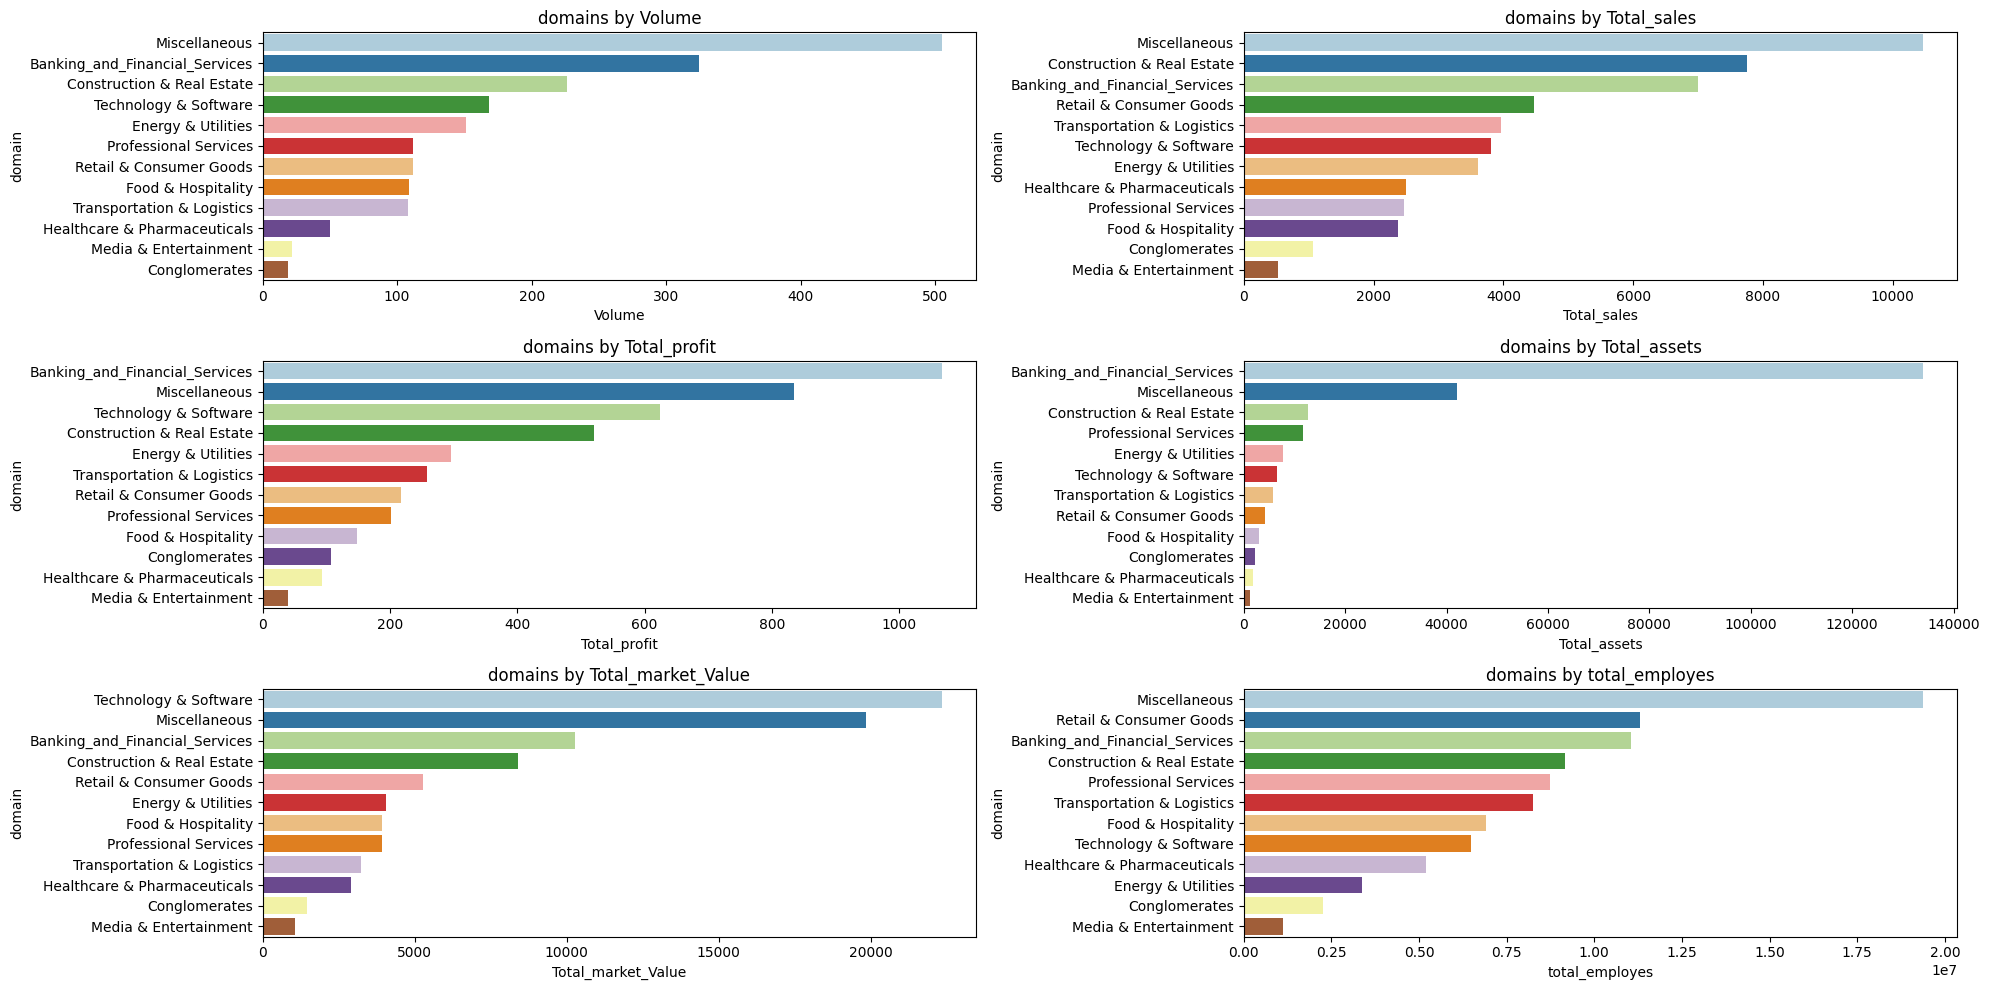

In [226]:
def plot (data):
    fig,ax = plt.subplots(3,2,figsize=(20,10))
    ax = ax.flatten()
    for i, col in enumerate(['Volume', 'Total_sales','Total_profit'
       ,'Total_assets', 'Total_market_Value',
       'total_employes']):
        data = data.sort_values(by=col,ascending=False)
        sns.barplot(data,y=data.index,x=col,hue='domain',palette='Paired',ax=ax[i] ,legend=False)
        ax[i].set_title(f'domains by {col}',size=12)
    plt.tight_layout()
plot(compagnies_domain)        


* **Banking and Financial Services**: Highly profitable and asset-rich but not the largest in employee numbers or volume.
* **Miscellaneous**: Dominates in volume, sales, and employment, showing diversified and widespread activity.
* **Technology & Software**: Holds the highest market value, indicating innovation and investor focus.
* **Construction & Real Estate**: Strong in sales, profit, and employment, emphasizing its economic importance.
* **Retail & Consumer Goods**: Provides significant employment but lags in profitability and assets.

### **Compagnies performance by Country**

In [201]:
compagnies_Country = df.groupby('Country').agg(
    Volume = ('Name','count'),
    Total_sales = ('Sales','sum'),
    avg_sales = ('Sales','mean'),
    Total_profit = ('Profit','sum'),
    avg_profit = ('Profit','mean'),
    Total_assets = ('Assets','sum'),
    avg_assets = ('Assets','mean'),
    Total_market_Value = ('Market Value','sum'),
    total_employes = ('Employees','sum')
    )  
compagnies_Country.head() 

,Volume,Total_sales,avg_sales,Total_profit,avg_profit,Total_assets,avg_assets,Total_market_Value,total_employes
Country,,,,,,,,,
Argentina,2,35.300,17.650000,2.1000,1.050000,31.8,15.900000,95.2,69962.0
Australia,31,546.823,17.639452,53.0804,1.712271,3966.0,127.935484,1103.0,998543.0
Austria,9,153.000,17.000000,12.9197,1.435522,845.8,93.977778,97.1,297822.0
Belgium,9,157.200,17.466667,15.2327,1.692522,770.0,85.555556,233.2,278469.0
Bermuda,8,97.100,12.137500,14.1010,1.762625,349.9,43.737500,98.2,490022.0


In [202]:
fig = go.Figure()
fig.add_trace(go.Choropleth(
    locations = compagnies_Country.index,
    locationmode = 'country names',
    z=compagnies_Country['Total_profit'],
    colorscale='tropic',
    text = compagnies_Country['Total_profit'],
    hoverinfo = 'location+z',
    
))
fig.update_layout(
    title="  Total entreprises Profit by   Country in Billion",
    height = 900
)
fig.show()

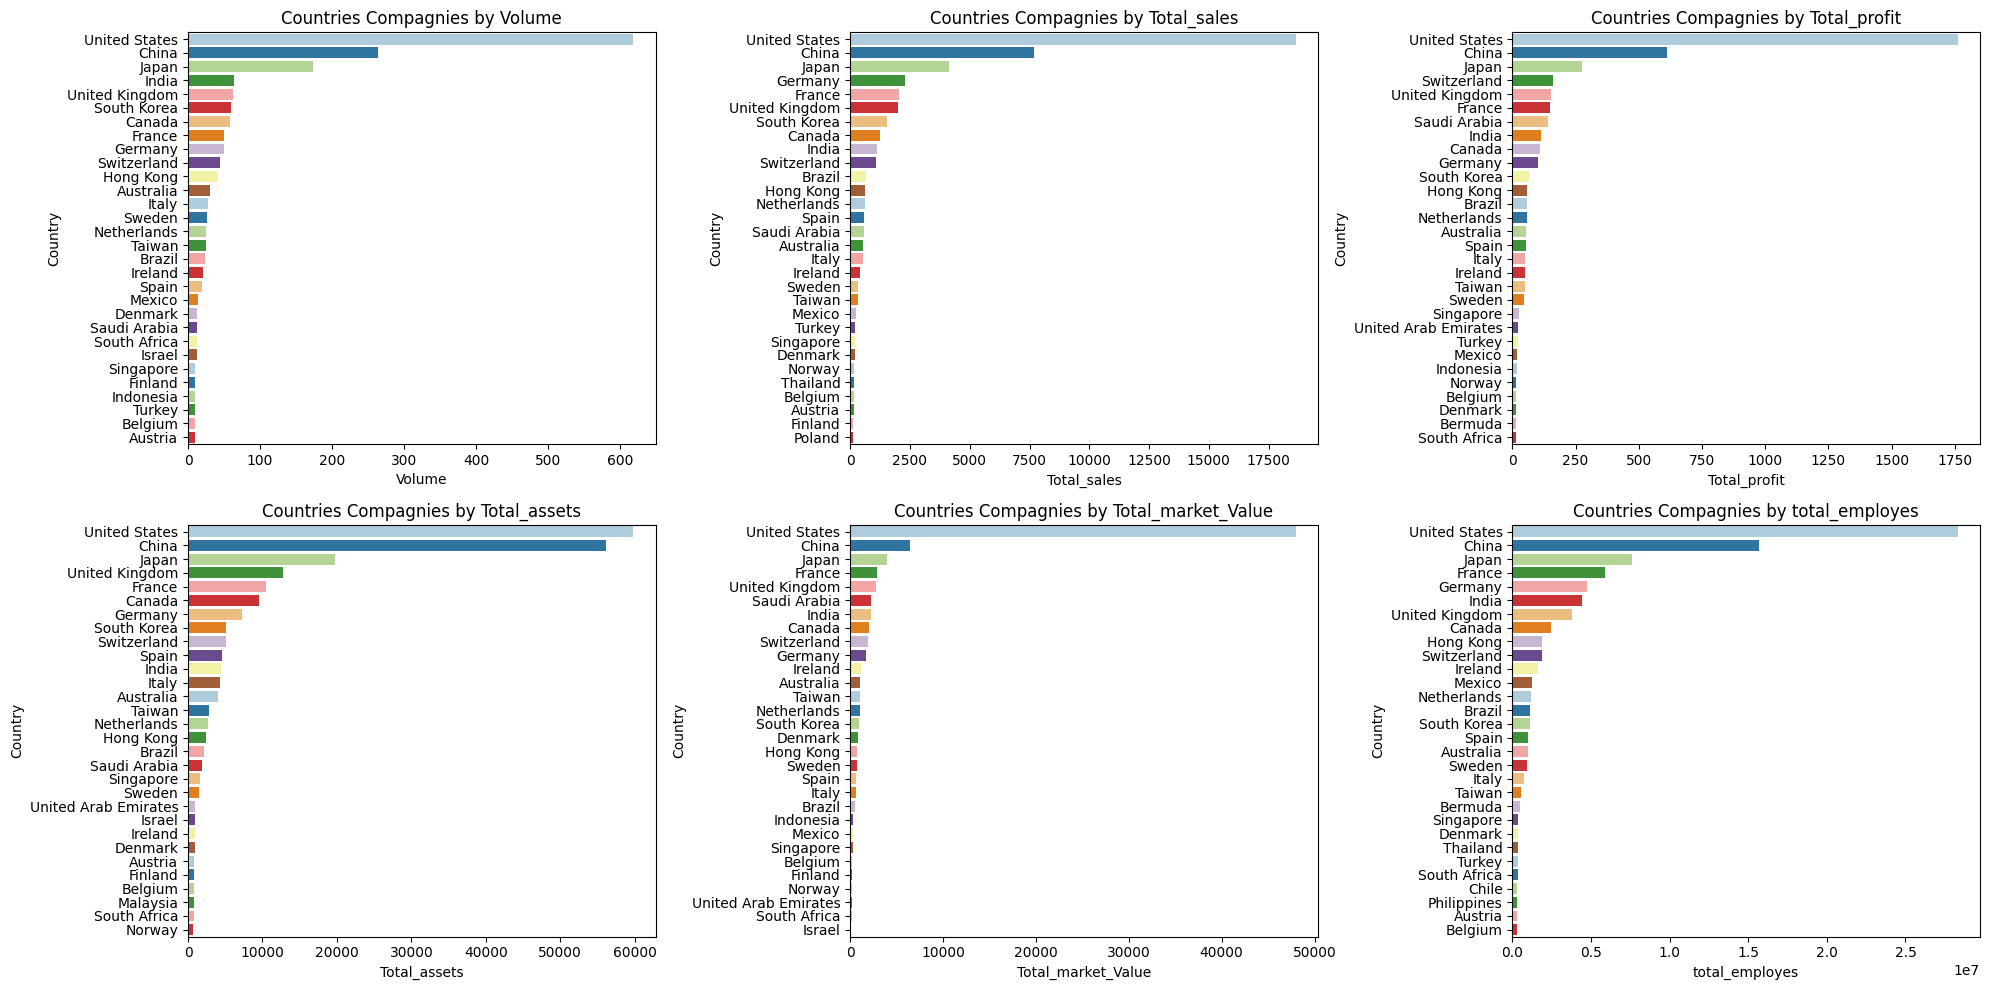

In [203]:
def plot (data):
    fig,ax = plt.subplots(2,3,figsize=(20,10))
    ax = ax.flatten()
    for i, col in enumerate(['Volume', 'Total_sales','Total_profit'
       ,'Total_assets', 'Total_market_Value',
       'total_employes']):
        data = data.sort_values(by=col,ascending=False)
        sns.barplot(data.iloc[:30,],y=data.iloc[:30,].index,x=col,hue='Country',palette='Paired',ax=ax[i] ,legend=False)
        ax[i].set_title(f'Countries Compagnies by {col}',size=12)
    plt.tight_layout()
plot(compagnies_Country)

### **features engennering**

## **Calculated Ratios**

### **1. Profit Ratios**
- **Profit Margin**  
   $$
   \text{Profit Margin} = \frac{\text{Profit}}{\text{Sales}}
   $$
   - Already represented in the table as `Profit_Ratio`.

---

### **2. Return on Assets (ROA)**
- Measures how efficiently a company uses its assets to generate profit:  
   $$
   \text{ROA} = \frac{\text{Profit}}{\text{Assets}}
   $$

---

### **3. Market-to-Assets Ratio**
- Measures the company's market value relative to its total assets:  
   $$
   \text{Market-to-Assets} = \frac{\text{Market Value}}{\text{Assets}}
   $$

---

### **4. Employee Productivity Ratios**
- **Sales per Employee**  
   $$
   \text{Sales per Employee} = \frac{\text{Sales}}{\text{Employees}}
   $$

- **Profit per Employee**  
   $$
   \text{Profit per Employee} = \frac{\text{Profit}}{\text{Employees}}
   $$

---

### **5. Asset Utilization Ratio**
- Measures how efficiently a company generates sales using its assets:  
   $$
   \text{Asset Utilization} = \frac{\text{Sales}}{\text{Assets}}
   $$

---

### **6. Market Value Ratios**
- **Market-to-Sales Ratio**  
   $$
   \text{Market-to-Sales} = \frac{\text{Market Value}}{\text{Sales}}
   $$

---

### **7. Employee-to-Assets Ratio**
- Compares the number of employees to the total assets:  
   $$
   \text{Employee-to-Assets} = \frac{\text{Employees}}{\text{Assets}}
   $$

---

### **Summary of Ratios**

| **Ratio**                  | **Formula**                                |
|----------------------------|--------------------------------------------|
| Profit Margin              | $$ \frac{\text{Profit}}{\text{Sales}} $$   |
| Return on Assets (ROA)     | $$ \frac{\text{Profit}}{\text{Assets}} $$  |
| Market-to-Assets Ratio     | $$ \frac{\text{Market Value}}{\text{Assets}} $$ |
| Sales per Employee         | $$ \frac{\text{Sales}}{\text{Employees}} $$ |
| Profit per Employee        | $$ \frac{\text{Profit}}{\text{Employees}} $$ |
| Asset Utilization          | $$ \frac{\text{Sales}}{\text{Assets}} $$  |
| Market-to-Sales Ratio      | $$ \frac{\text{Market Value}}{\text{Sales}} $$ |
| Employee-to-Assets Ratio   | $$ \frac{\text{Employees}}{\text{Assets}} $$ |


In [204]:
df['Profit_Ratio'] = df['Profit']/df['Sales']
df['retun_of_assets'] = df['Profit']/df['Assets']
df['market_to_assets'] = df['Market Value']/df['Assets']
df['sales per employee'] = df['Sales']/df['Employees']
df['Profit per employe'] = df['Profit']/df['Employees']
df['assets_utilisation'] = df['Sales']/df['Assets']

In [205]:
df.head(5)

,Rank,Name,Sales,Profit,Assets,Market Value,Industry,Founded,Headquarters,Country,CEO,Employees,domain,Profit_Ratio,retun_of_assets,market_to_assets,sales per employee,Profit per employe,assets_utilisation
0,1,JPMorgan Chase,252.9,50.0,4090.7,588.1,Banking and Financial Services,2000.0,New York- New York,United States,Jamie Dimon,186751.0,Banking_and_Financial_Services,0.197707,0.012223,0.143765,0.001354,0.000268,0.061823
1,2,Berkshire Hathaway,369.0,73.4,1070.0,899.1,Conglomerate,1839.0,Omaha- Nebraska,United States,Warren Edward Buffett,396500.0,Conglomerates,0.198916,0.068598,0.840280,0.000931,0.000185,0.344860
2,3,Saudi Arabian Oil Company (Saudi Aramco),489.1,116.9,661.5,1919.3,Construction- Chemicals- Raw Materials,1933.0,Dhahran,Saudi Arabia,Amin bin Hasan Al-Nasser,70000.0,Construction & Real Estate,0.239010,0.176720,2.901436,0.006987,0.001670,0.739380
3,4,ICBC,223.8,50.4,6586.0,215.2,Banking and Financial Services,1984.0,Beijing,China,Wang Jingwu,427587.0,Banking_and_Financial_Services,0.225201,0.007653,0.032675,0.000523,0.000118,0.033981
4,5,Bank of America,183.3,25.0,3273.8,307.3,Banking and Financial Services,1904.0,Charlotte- North Carolina,United States,Brian T. Moynihan,166140.0,Banking_and_Financial_Services,0.136388,0.007636,0.093866,0.001103,0.000150,0.055990


### **Deep look into the 5 top compagnie**

In [250]:
df_top5 = df[df.Rank <= 5]
df_top5.columns

Index(['Rank', 'Name', 'Sales', 'Profit', 'Assets', 'Market Value', 'Industry',
       'Founded', 'Headquarters', 'Country', 'CEO', 'Employees', 'domain',
       'Profit_Ratio', 'retun_of_assets', 'market_to_assets',
       'sales per employee', 'Profit per employe', 'assets_utilisation'],
      dtype='object')

In [284]:
cols = ['Rank','Sales', 'Profit', 'Assets', 'Market Value',
         'Employees',
       'Profit_Ratio', 'retun_of_assets', 'market_to_assets',
       'Profit per employe','sales per employee', 'assets_utilisation']

In [256]:
len(col)

12

In [228]:
from IPython.display import Markdown, display

In [269]:
df_top5.at[2, 'Name'] = 'Saudi Aramco'

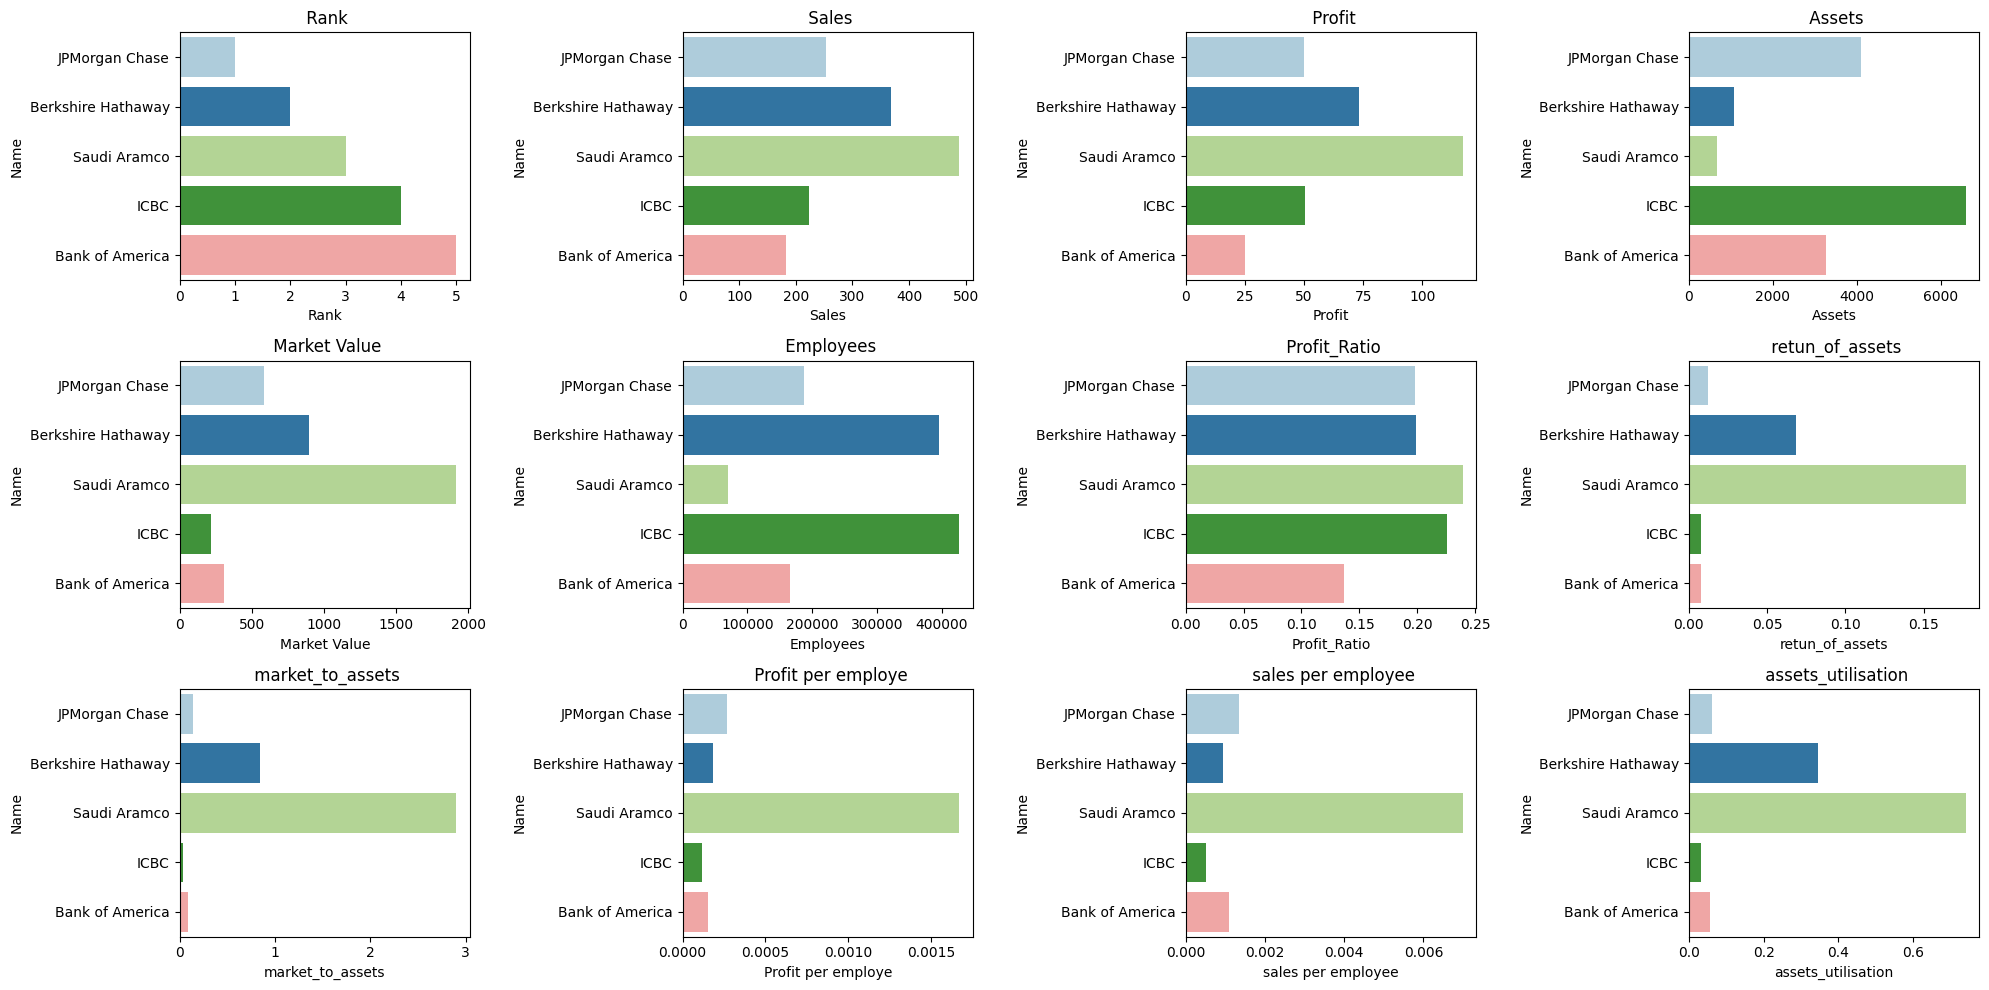

In [286]:
def plot (data):
    fig,ax = plt.subplots(3,4,figsize=(20,10))
    ax = ax.flatten()
    for i, col in enumerate(cols):
        sns.barplot(data,y='Name',x=col,hue='Name',palette='Paired',ax=ax[i] ,legend=False)
        ax[i].set_title(f' {col}',size=12)
    for j in range(len(cols), len(ax)):
        fig.delaxes(ax[j])
        
    plt.tight_layout()
plot(df_top5)

In [289]:
df_num = df[['Sales', 'Profit', 'Assets', 'Market Value',
        'Headquarters', 'Employees', 'domain',
       'Profit_Ratio', 'retun_of_assets', 'market_to_assets',
       'sales per employee', 'Profit per employe', 'assets_utilisation']]
df_num.head()      

,Sales,Profit,Assets,Market Value,Headquarters,Employees,domain,Profit_Ratio,retun_of_assets,market_to_assets,sales per employee,Profit per employe,assets_utilisation
0,252.9,50.0,4090.7,588.1,New York- New York,186751.0,Banking_and_Financial_Services,0.197707,0.012223,0.143765,0.001354,0.000268,0.061823
1,369.0,73.4,1070.0,899.1,Omaha- Nebraska,396500.0,Conglomerates,0.198916,0.068598,0.840280,0.000931,0.000185,0.344860
2,489.1,116.9,661.5,1919.3,Dhahran,70000.0,Construction & Real Estate,0.239010,0.176720,2.901436,0.006987,0.001670,0.739380
3,223.8,50.4,6586.0,215.2,Beijing,427587.0,Banking_and_Financial_Services,0.225201,0.007653,0.032675,0.000523,0.000118,0.033981
4,183.3,25.0,3273.8,307.3,Charlotte- North Carolina,166140.0,Banking_and_Financial_Services,0.136388,0.007636,0.093866,0.001103,0.000150,0.055990


In [208]:
dummies = pd.get_dummies(df['domain'])
dummies = dummies.map(lambda x: 1 if x == True else 0 )
dummies

,Banking_and_Financial_Services,Conglomerates,Construction & Real Estate,Energy & Utilities,Food & Hospitality,Healthcare & Pharmaceuticals,Media & Entertainment,Miscellaneous,Professional Services,Retail & Consumer Goods,Technology & Software,Transportation & Logistics
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0,0,0,1,0,0,0,0,0,0,0,0
1997,1,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,1,0,0
1999,0,0,0,0,0,0,0,1,0,0,0,0


In [209]:
dummies.columns

Index(['Banking_and_Financial_Services', 'Conglomerates',
       'Construction & Real Estate', 'Energy & Utilities',
       'Food & Hospitality', 'Healthcare & Pharmaceuticals',
       'Media & Entertainment', 'Miscellaneous', 'Professional Services',
       'Retail & Consumer Goods', 'Technology & Software',
       'Transportation & Logistics'],
      dtype='object')

In [210]:
df_num = pd.concat([df_num,dummies],axis=1)
df_num.drop('domain',axis=1,inplace=True)
df_num.drop('Headquarters',axis=1,inplace=True)

### **Correlation of features**

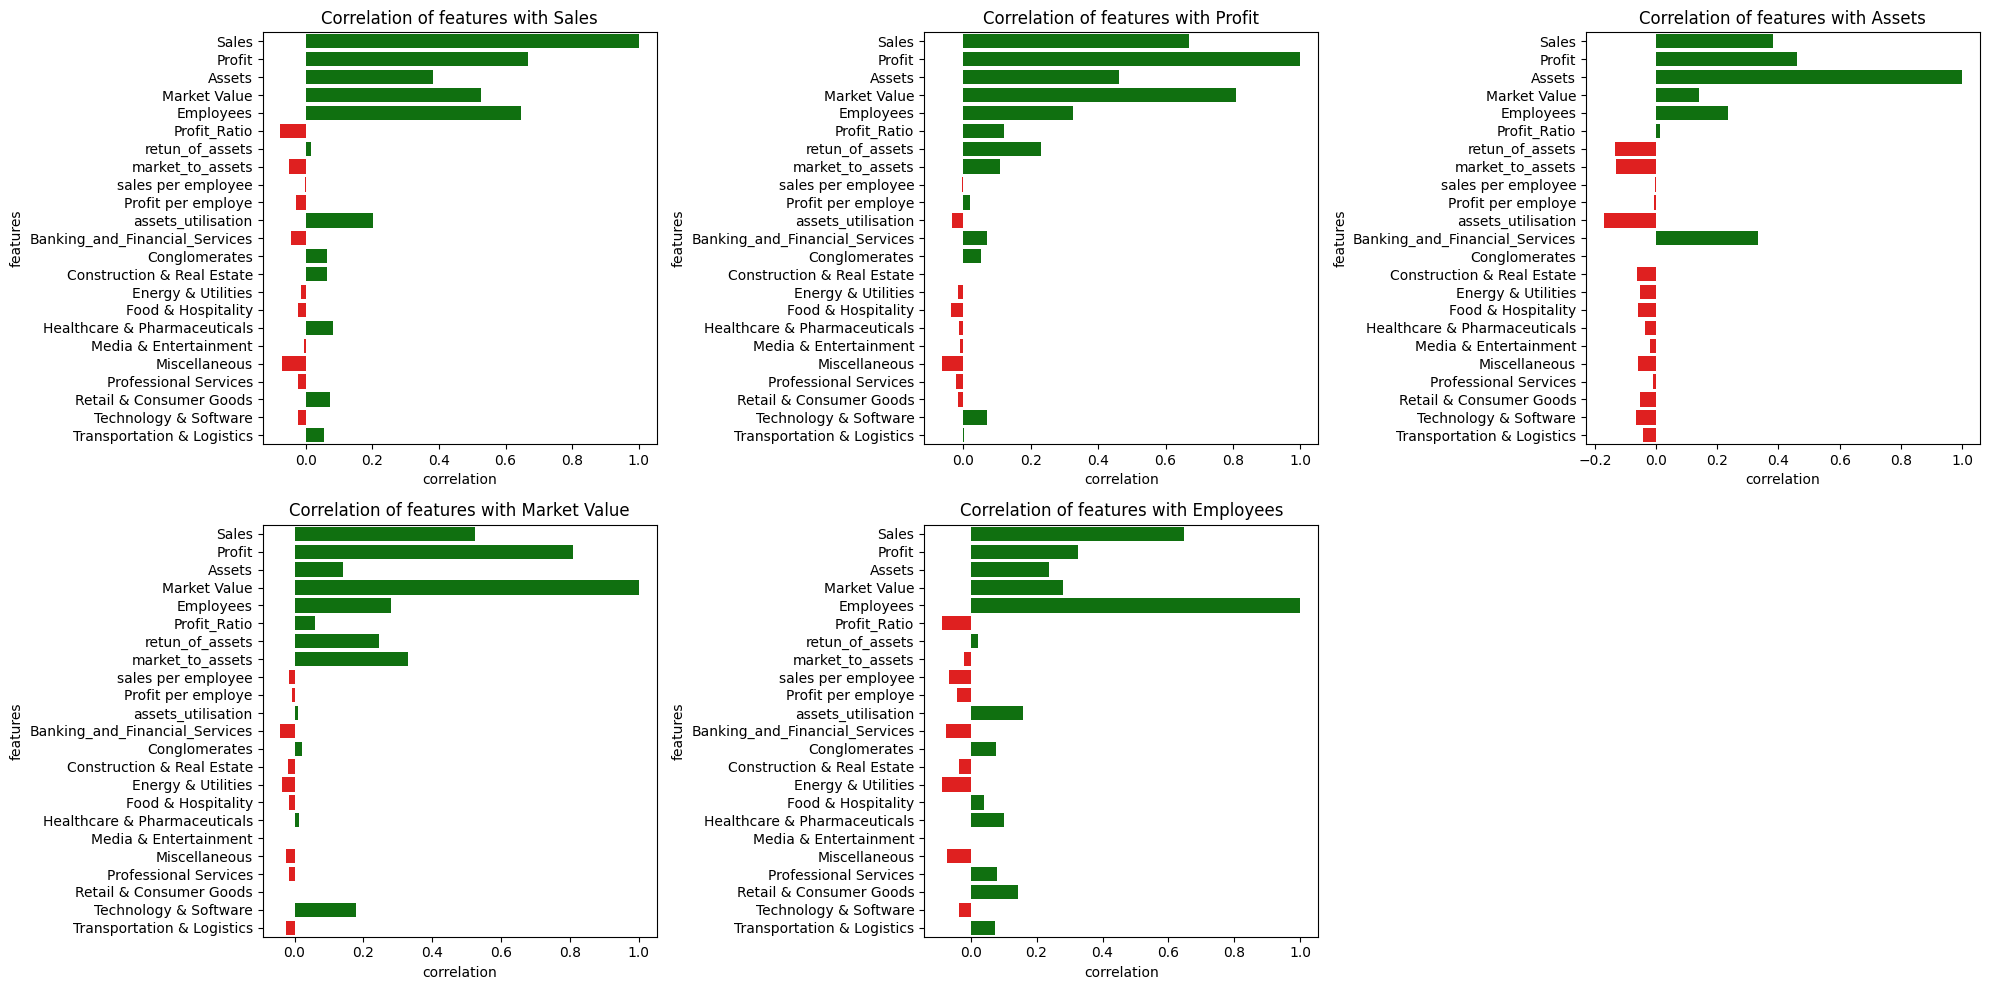

In [288]:
def corr_plot(data):
    fig,ax = plt.subplots(2,3,figsize=(20,10))
    ax = ax.flatten()
    cols = ['Sales', 'Profit', 'Assets', 'Market Value', 'Employees']

    for i , col in enumerate(cols):
        corr = pd.DataFrame(data.corrwith(data[col]),columns=['correlation'])
        sns.barplot(corr,y=corr.index,x='correlation',legend=False,ax=ax[i],palette=['red' if x <= 0 else 'green' for x in corr['correlation']])
        ax[i].set_title(f'Correlation of features with {col}')
        ax[i].set_ylabel('features')
    for j in range(len(cols), len(ax)):
        fig.delaxes(ax[j])    
    plt.tight_layout()    
corr_plot(df_num)        

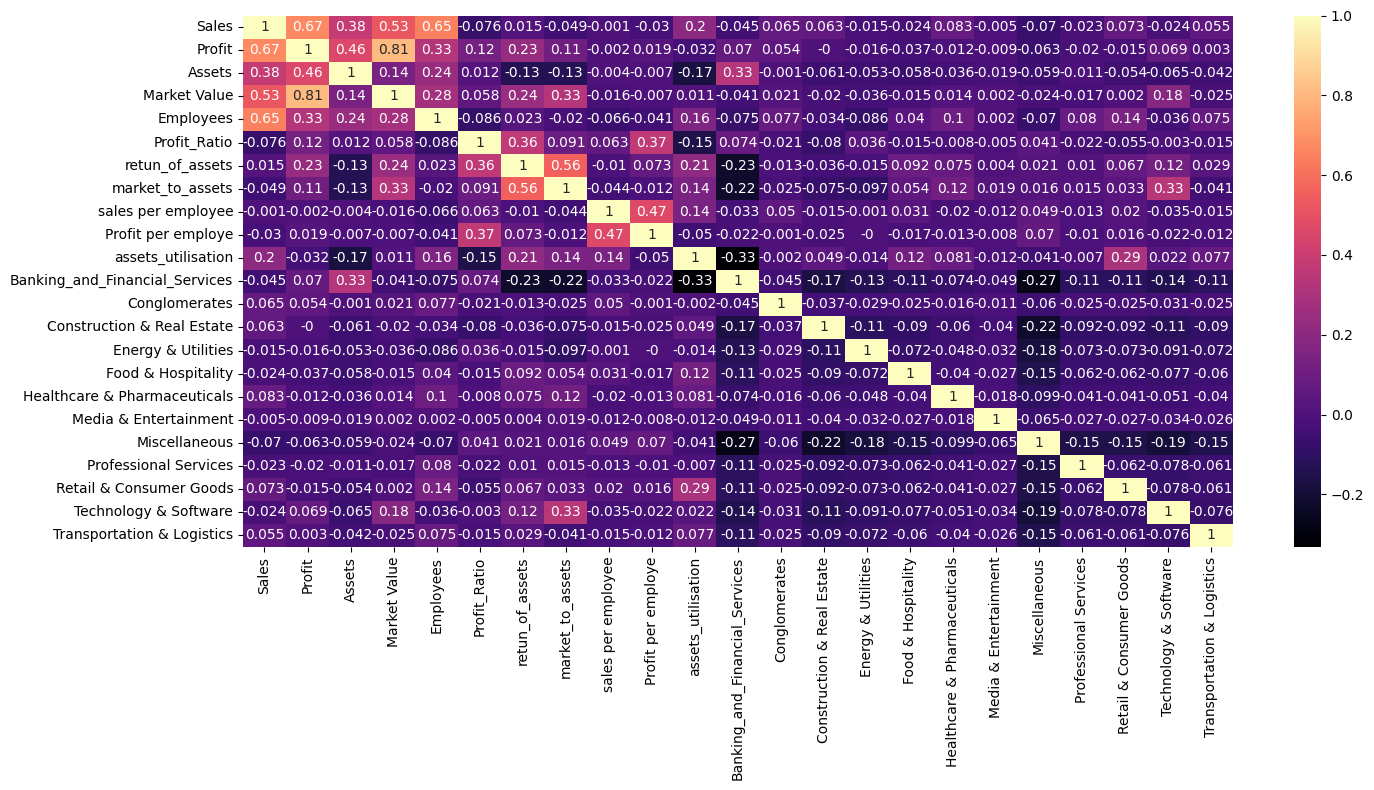

In [212]:
plt.figure(figsize=(15,8))
sns.heatmap(round(df_num.corr(),3),cmap='magma',annot=True)
plt.tight_layout()

### **Profit Prediction**

### 🚀 **Next Steps: Building a Profit Prediction Model**  

In this project, our goal is to create a model that accurately predicts **Profit** based on various company features. Here’s the step-by-step plan to get us there:

---

#### 1. **Import Necessary Libraries**  
We’ll start by importing the essential libraries for data manipulation, preprocessing, and machine learning.

---

#### 2. **Data Preprocessing with ColumnTransformer**  
To ensure that our model performs optimally, we’ll preprocess the data using a **ColumnTransformer**. The idea here is to handle continuous and binary data differently:

- For **Continuous Features** (e.g., revenue, market value):
  - Apply **Standard Scaling** to normalize the values.

- For **Binary Features** (0/1 data, e.g., company type or location):
  - Use the **passthrough method** to retain their original form.

---

#### 3. **Splitting the Data**  
Next, we’ll split our dataset into **training** and **testing** sets. This ensures that our evaluation results are accurate and unbiased, allowing us to test the model's real-world performance.

---

#### 4. **Train and Evaluate Models**  
We’ll train three powerful models to predict profits:

- **Random Forest Regressor**  
- **Support Vector Regression (SVR)**  
- **XGBoost Regressor**

For each model, we’ll evaluate its performance using the **Mean Squared Error** metric.

---

#### 5. **Visualize Predictions vs. Actual Values**  
Finally, we’ll visualize the predictions against the actual profit values using **seaborn’s displot**. This comparison will help us analyze the accuracy of our models and identify areas where improvements are needed.

---



In [213]:
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.preprocessing import  StandardScaler
from sklearn.ensemble import  RandomForestRegressor
from xgboost import  XGBRegressor
from sklearn.svm import  SVR
from sklearn.metrics import  mean_absolute_percentage_error,mean_squared_error
from sklearn.compose import ColumnTransformer

In [214]:
col_contunious = list(df_num.iloc[:,:11].columns)
col_binary = list(df_num.iloc[:,11:].columns)
print(col_contunious),print(col_binary)

['Sales', 'Profit', 'Assets', 'Market Value', 'Employees', 'Profit_Ratio', 'retun_of_assets', 'market_to_assets', 'sales per employee', 'Profit per employe', 'assets_utilisation']
['Banking_and_Financial_Services', 'Conglomerates', 'Construction & Real Estate', 'Energy & Utilities', 'Food & Hospitality', 'Healthcare & Pharmaceuticals', 'Media & Entertainment', 'Miscellaneous', 'Professional Services', 'Retail & Consumer Goods', 'Technology & Software', 'Transportation & Logistics']


(None, None)

In [215]:
Transformer = ColumnTransformer(
    transformers = [('continuous',StandardScaler(),col_contunious),
                    ('binary','passthrough',col_binary)]
                    )
df_scaled = Transformer.fit_transform(df_num) 
df_scaled = pd.DataFrame(df_scaled,columns=col_contunious+col_binary)  
df_scaled.head()            

,Sales,Profit,Assets,Market Value,Employees,Profit_Ratio,retun_of_assets,market_to_assets,sales per employee,Profit per employe,...,Construction & Real Estate,Energy & Utilities,Food & Hospitality,Healthcare & Pharmaceuticals,Media & Entertainment,Miscellaneous,Professional Services,Retail & Consumer Goods,Technology & Software,Transportation & Logistics
0,4.839997,7.548822,9.993255,3.553360,1.529973,0.261941,-0.539735,-0.527534,-0.078443,-0.049918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.319111,11.253038,2.386692,5.590065,3.858374,0.266328,0.340611,-0.210538,-0.100665,-0.059772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.883638,18.139080,1.358030,12.271241,0.233932,0.411793,2.029014,0.727530,0.217091,0.117337,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.218617,7.612142,16.276784,1.111279,4.203468,0.361692,-0.611103,-0.578093,-0.122031,-0.067793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.353810,3.591326,7.936182,1.714432,1.301172,0.039475,-0.611356,-0.550244,-0.091607,-0.063904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [216]:
x,y = df_scaled.drop('Profit',axis=1),df_scaled['Profit']

In [217]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

The MSE of RandomForestRegressor: 0.02252696855561669 
________________________________________________________________________________
The MSE of SVR: 0.1311507453425006 
________________________________________________________________________________
The MSE of XGBRegressor: 0.13925832976406252 
________________________________________________________________________________


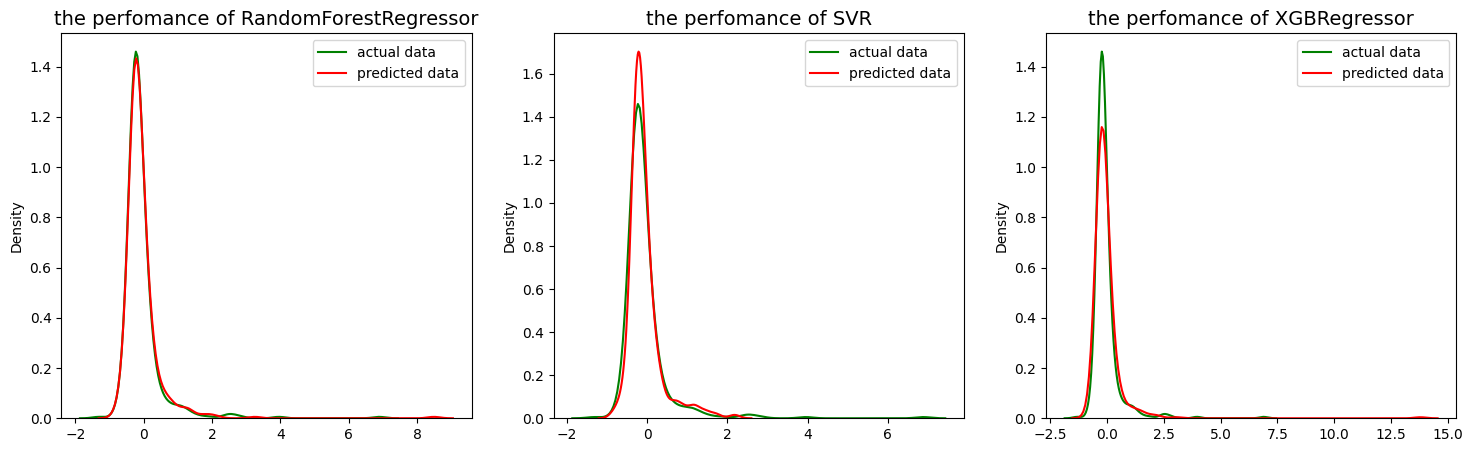

In [218]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Models list
models = [RandomForestRegressor(), SVR(), XGBRegressor()]


# Function for training and evaluating models
def models_training_evaluating(models):
    plt.figure(figsize=(18,5))
    for i, model in enumerate(models):
        
        # Train the model
        model.fit(x_train, y_train)
        
        # Make predictions
        y_pred = model.predict(x_test)
        
        # Calculate Mean Squared Error
        mse = mean_squared_error(y_test, y_pred)
        
        # Print the result
        print(f"The MSE of {model.__class__.__name__}: {mse} ")
        print('_'*80)

        plt.subplot(1,3,i+1)
        ax = sns.distplot(x=y_test,label='actual data',color='green',kde=True,hist=False)
        sns.distplot(x=y_pred,label='predicted data',color='red',hist=False)
        plt.title(f'the perfomance of {model.__class__.__name__}',size=14)
        plt.legend()
plt.show()


models_training_evaluating(models)

        
    

In [ ]:
jupyter nbconvert corp_analysis.ipynb --to slides post serve

In [ ]:
jupyter nbconvert --to slides  corp_analysis.ipynb.ipynb --post serve

In [ ]:
§
